In [1]:
# Data Preprocessing

In [2]:
## Importing Dataset

In [35]:
import pandas as pd

# Load dataset from CSV file
df = pd.read_csv("Synthetic_Energy_Consumption_Data.csv")

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Display dataset shape
print(f"\nDataset Shape: {df.shape}")

First few rows of the dataset:
   home_size  num_residents  num_appliances  insulation_rating   avg_temp  \
0       1660              2               8                  1   2.744112   
1       4572              5               6                  1  27.126542   
2       3892              1              24                  6  -6.168210   
3       1266              1              20                  5  33.631790   
4       4244              1              22                  8  31.405841   

   energy_consumption  
0         4027.967125  
1         5305.413214  
2         4826.233350  
3         2362.534645  
4         3928.127799  

Dataset Shape: (1000, 6)


In [ ]:
## Check for Missing Values

In [13]:
## Detecting Outliers

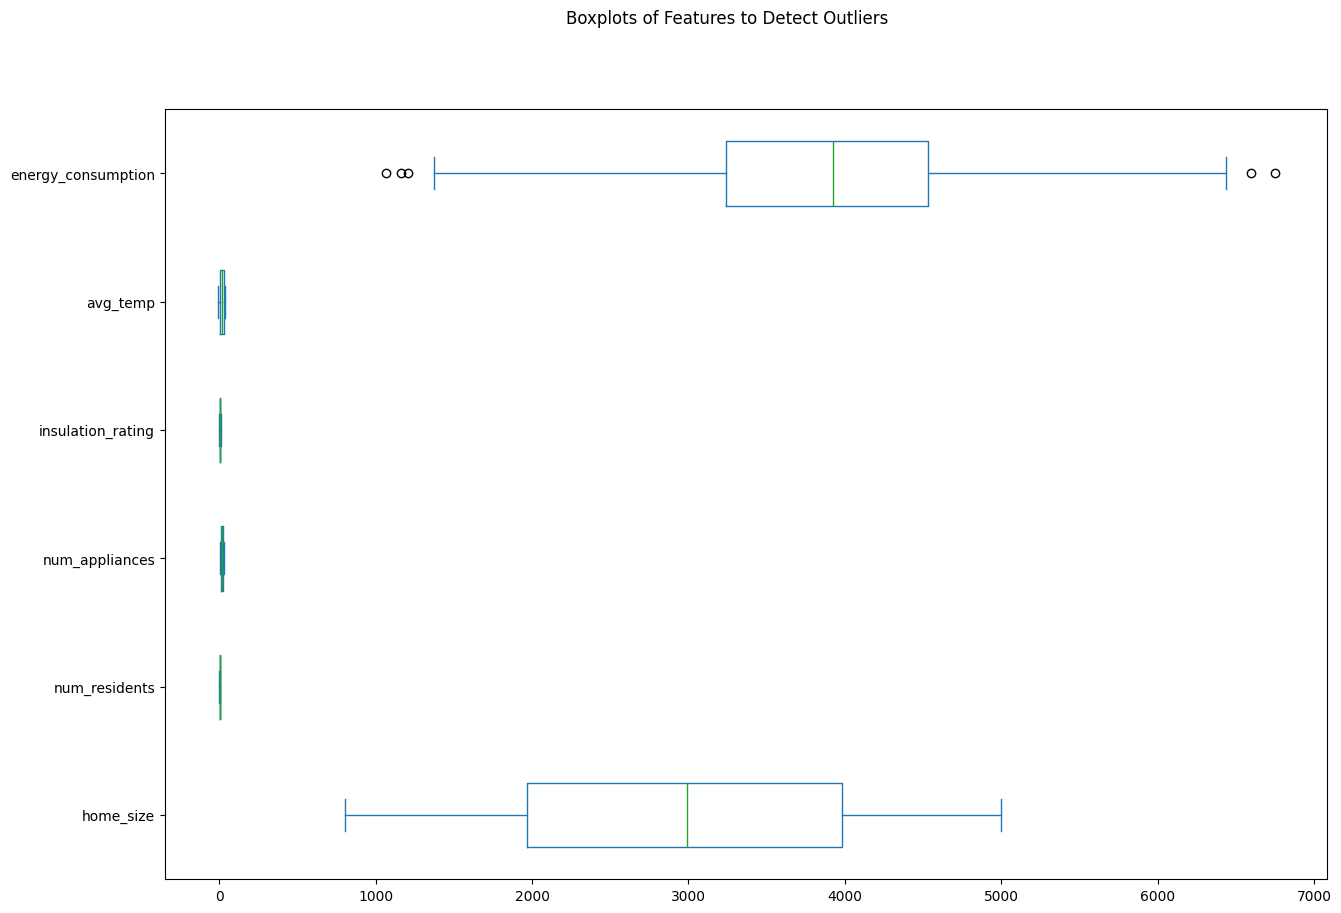

In [36]:
import matplotlib.pyplot as plt

# Plot boxplots to visualize outliers for each numerical column
df.plot(kind='box', subplots=False, layout=(2, 3), figsize=(15, 10), vert=False)
plt.suptitle("Boxplots of Features to Detect Outliers")
plt.show()

In [ ]:
## Removing Outliers

In [37]:
import numpy as np

# function to remove the outliers
def remove_outliers_iqr(df, column): # column lets us pass in a specific column name
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5
    
    # removing the outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# removing the outliers from each column
for col in ["home_size", "num_residents", "num_appliances", "insulation_rating", "avg_temp", "energy_consumption"]:
    df = remove_outliers_iqr(df, col)

# resetting all of the indicies in the df after removing the outliers
df.reset_index(drop=True, inplace=True)

# showing the updated dataset shape
print(f"Dataset shape after outlier removal: {df.shape}")

Dataset shape after outlier removal: (995, 6)


In [ ]:
## checking feature importance

In [ ]:
### checking correlation

In [ ]:
#### removing non-numeric data types

In [24]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (0, 6)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


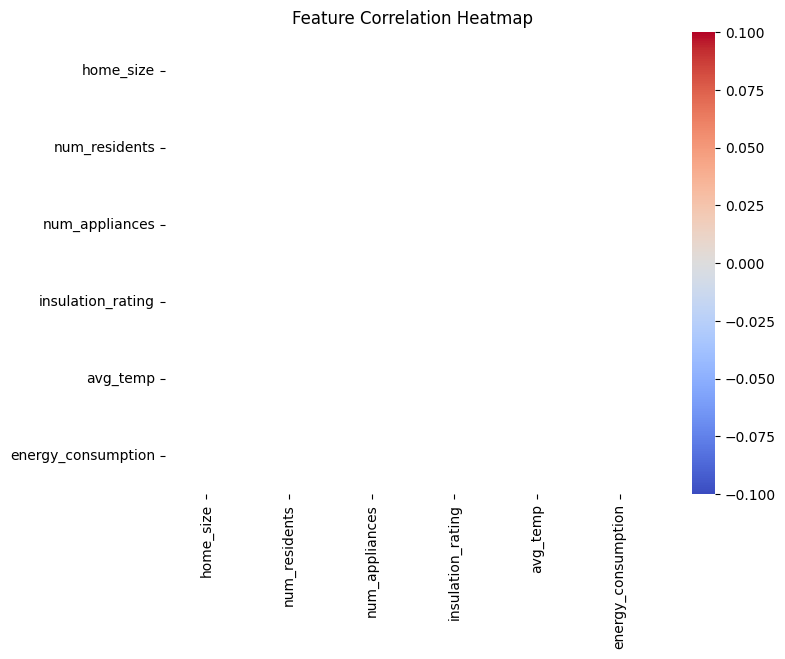

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating the correlation matrix
correlation_matrix = df.corr()

# visualize it with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# need to scale the data now (have drastically different numbers)